In [1]:
import sklearn.datasets as ds
import numpy as np

# Data IO
data, target = ds.load_breast_cancer(True)

In [2]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score


from scipy import interp
import matplotlib.pyplot as plt
%matplotlib inline

# Convert to ndarray 
X = np.array(data)
y = np.array(target)


# Create classifier
# support vector classifier
svc = SVC(probability=True)
# k-nearest neighbors
knn = KNeighborsClassifier()
print("svc\t:", svc, "\n")
print("knn\t:", knn, "\n")

# set hyper parameter
parameters_svc = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}
parameters_knn = {'n_neighbors':[1,3,5,7]}

# GridSearchCV classifier
# GridSearchCV return the parameters that is optimized by cross-validation
gs_svc = GridSearchCV(svc, parameters_svc, cv=2)
gs_knn = GridSearchCV(knn, parameters_knn, cv=2)
print("gs_svc\t:", gs_svc, "\n")
print("gs_knn\t:", gs_svc, "\n")


# gs_svc.fit(data, target)
# print("gs_svc.best_score_\t:", gs_svc.best_score_)
# print("gs_svc.best_params_\t:", gs_svc.best_params_)

# gs_knn.fit(data, target)
# print("gs_knn.best_score_\t:", gs_knn.best_score_)
# print("gs_knn.best_params_\t:", gs_knn.best_params_)

svc	: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 

knn	: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') 

gs_svc	: GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0) 

gs_knn	: GridSearchCV(cv=2, error_score='raise-

skf	: StratifiedKFold(n_splits=3, random_state=None, shuffle=True) 

loop 0
fitting svc...
fitting knn...
fit complete
loop 1
fitting svc...


/home/guest/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


fitting knn...
fit complete
loop 2
fitting svc...


/home/guest/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


fitting knn...
fit complete


/home/guest/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


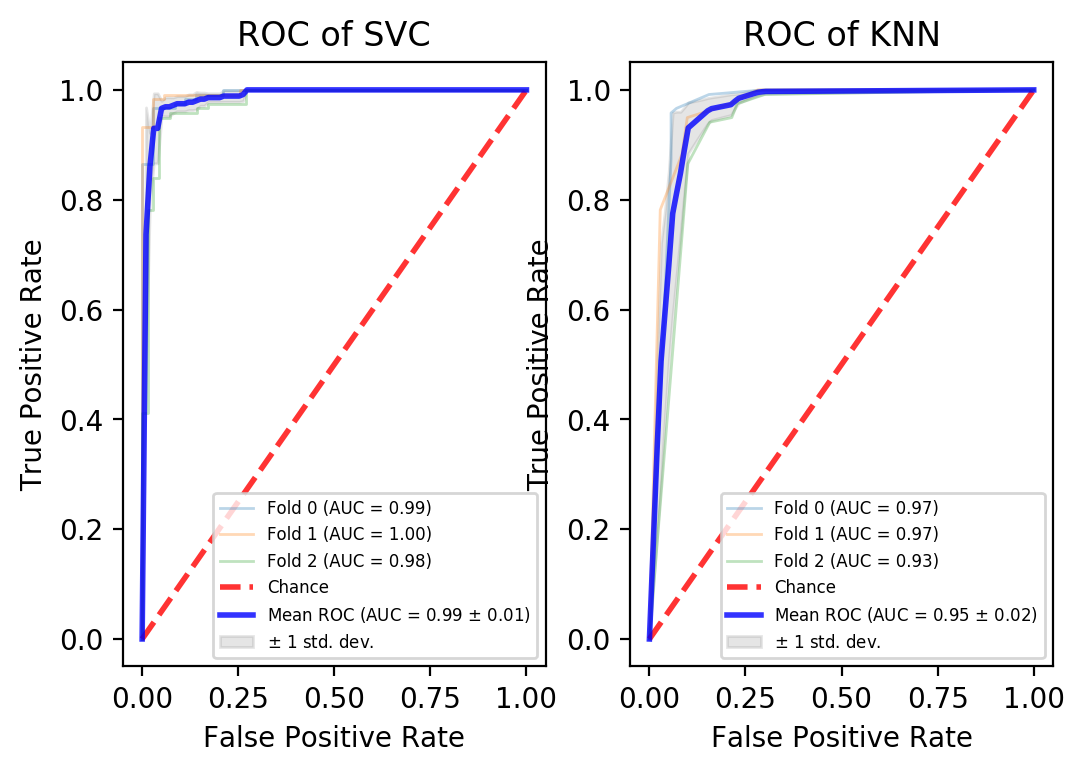

In [3]:
# Run classifier with cross-validation and plot ROC curves
# KFold
skf = StratifiedKFold(n_splits=3, shuffle=True)
print("skf\t:", skf, "\n")  

from sklearn.metrics import roc_curve, auc
tprs_svc = []
aucs_svc = []
mean_svc_fpr = np.linspace(0, 1, 100)
tprs_knn = []
aucs_knn = []
mean_knn_fpr = np.linspace(0, 1, 100)

plt.figure(dpi = 200)
plt.subplot(1,2,1)
plt.subplot(1,2,2)
i = 0
for train_index, test_index in skf.split(X, y):
    print("loop", i)
    # split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("fitting svc...")
    probas_svc = gs_svc.fit(X_train, y_train).predict_proba(X_test)
    print("fitting knn...")
    probas_knn = gs_knn.fit(X_train, y_train).predict_proba(X_test)
    print("fit complete")
    
    # Compute ROC curve and area the curve
    fpr_svc, tpr_svc, thresholds_svc = roc_curve(y[test_index], probas_svc[:, 1])
    tprs_svc.append(interp(mean_svc_fpr, fpr_svc, tpr_svc))
    tprs_svc[-1][0] = 0.0
    roc_auc_svc = auc(fpr_svc, tpr_svc)
    aucs_svc.append(roc_auc_svc)
    
    plt.subplot(1,2,1)
    plt.plot(fpr_svc, tpr_svc, lw=1, alpha=0.3,
             label='Fold %d (AUC = %0.2f)' % (i, roc_auc_svc))
    plt.legend(loc="lower right", prop={'size': 6})
    
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y[test_index], probas_knn[:, 1])
    tprs_knn.append(interp(mean_knn_fpr, fpr_knn, tpr_knn))
    tprs_knn[-1][0] = 0.0
    roc_auc_knn = auc(fpr_knn, tpr_knn)
    aucs_knn.append(roc_auc_knn)
    
    plt.subplot(1,2,2)
    plt.plot(fpr_knn, tpr_knn, lw=1, alpha=0.3,
             label='Fold %d (AUC = %0.2f)' % (i, roc_auc_knn))
    plt.legend(loc="lower right", prop={'size': 6})
    plt.legend()
    i = i + 1

# plot diagonal line
plt.subplot(1,2,1)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.legend(loc="lower right", prop={'size': 6})

plt.subplot(1,2,2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.legend(loc="lower right", prop={'size': 6})


# clculate and plot "Mean ROC Curve"
mean_svc_tpr = np.mean(tprs_svc, axis=0)
mean_svc_tpr[-1] = 1.0
mean_svc_auc = auc(mean_svc_fpr, mean_svc_tpr)
std_svc_auc = np.std(aucs_svc)
plt.subplot(1,2,1)
plt.plot(mean_svc_fpr, mean_svc_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_svc_auc, std_svc_auc),
         lw=2, alpha=.8)
plt.legend(loc="lower right", prop={'size': 6})

mean_knn_tpr = np.mean(tprs_knn, axis=0)
mean_knn_tpr[-1] = 1.0
mean_knn_auc = auc(mean_knn_fpr, mean_knn_tpr)
std_knn_auc = np.std(aucs_knn)
plt.subplot(1,2,2)
plt.plot(mean_knn_fpr, mean_knn_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_knn_auc, std_knn_auc),
         lw=2, alpha=.8)
plt.legend(loc="lower right", prop={'size': 6})


# fill area between +- 1 std
std_svc_tpr = np.std(tprs_svc, axis=0)
tprs_svc_upper = np.minimum(mean_svc_tpr + std_svc_tpr, 1)
tprs_svc_lower = np.maximum(mean_svc_tpr - std_svc_tpr, 0)
plt.subplot(1,2,1)
plt.fill_between(mean_svc_fpr, tprs_svc_lower, tprs_svc_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right", prop={'size': 6})

std_knn_tpr = np.std(tprs_knn, axis=0)
tprs_knn_upper = np.minimum(mean_knn_tpr + std_knn_tpr, 1)
tprs_knn_lower = np.maximum(mean_knn_tpr - std_knn_tpr, 0)
plt.subplot(1,2,2)
plt.fill_between(mean_knn_fpr, tprs_knn_lower, tprs_knn_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.legend(loc="lower right", prop={'size': 6})


# set label
plt.subplot(1,2,1)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVC')

plt.subplot(1,2,2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of KNN')

plt.savefig("ML1over.png", dpi = 200)


In [4]:
# svc_scores = cross_val_score(gs_svc, data, target, scoring='accuracy',cv = skf)
# print("svc_scores\t:", svc_scores, "\n")

# knn_scores = cross_val_score(gs_knn, data, target, scoring='accuracy',cv = skf)
# print("knn_scores\t:", knn_scores, "\n")